In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import std
import os

In [104]:
# Read csv file
df = pd.read_csv("./loss-data.csv")

# Data cleaning
df = df.rename({'1/1 [==============================] - 0s 185ms/step': 'Loss'}, axis=1) 
df = df[df["Loss"].str.contains("1/1") == False]
df = pd.concat([df['Loss'].str.split(' ', expand=True)], axis=1)
df = df.rename({3: 'Discriminator Loss', 5: 'Discriminator Accuracy', 8: 'Generator Loss'}, axis=1) 
df = df.drop(columns=[0, 1, 2, 4, 6, 7])
df = df.replace(',','', regex=True)
df = df.replace(']','', regex=True)
df = df.replace('%','', regex=True)
df = df.astype(float)
df["Discriminator Accuracy"] = df["Discriminator Accuracy"]/100
df = df.reset_index()
df = df.drop(columns=["index"])
df = df.reset_index()
df["index"] = df["index"] + 1
df = df.rename({'index': 'epochs'}, axis=1)
df

,epochs,Discriminator Loss,Discriminator Accuracy,Generator Loss
0,1,0.429183,0.7344,0.679539
1,2,0.322558,0.9062,0.784708
2,3,0.303473,0.9219,0.901193
3,4,0.294629,0.9531,1.059700
4,5,0.239051,1.0000,1.170937
...,...,...,...,...
18259,18260,0.623584,0.6406,1.078758
18260,18261,0.557439,0.7188,0.963195
18261,18262,0.652016,0.6094,1.038996
18262,18263,0.688639,0.5625,1.013633


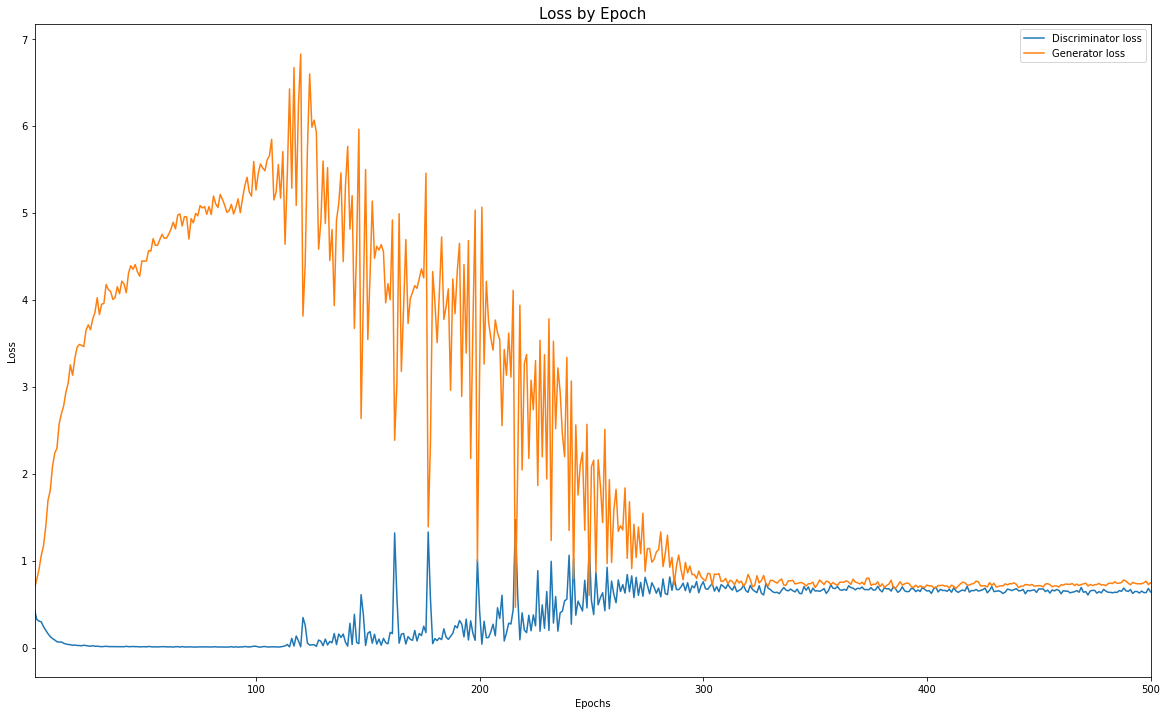

In [114]:
x = df["epochs"]
y1 = df["Discriminator Loss"]
y2 = df["Generator Loss"]

plt.figure(figsize=(20,12))
plt.plot(x, y1, label="Discriminator loss")
plt.plot(x, y2, label="Generator loss")

plt.xlim([1, 500])
plt.title("Loss by Epoch", fontsize = 15)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('losses')
plt.show()